In [49]:
import json
with open("h2_hamiltonian.json", "r") as file_io:
   data = json.load(file_io)

from pytket.utils.operators import QubitPauliOperator
operator = QubitPauliOperator.from_list(data)

In [50]:
import numpy as np
operator_matrix = operator.to_sparse_matrix().todense()
operator_matrix
psi_vec = np.array([psi]).T
psi_vec.shape
psi_vec

array([[ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.1070281-0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [-0.994256 +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j]])

In [52]:
psi_vec=np.array([psi]).T
psi_vec.shape

(16, 1)

In [53]:
psi_vec

array([[ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.1070281-0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [-0.994256 +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j],
       [ 0.       +0.j]])

array([0.+0.j])

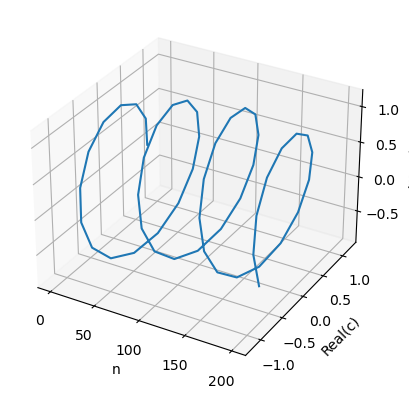

In [60]:
from scipy.sparse.linalg import expm_multiply
#print(operator_matrix.shape)
#print(psi_vec.shape)
n=0.00001
t=0.1
a = operator_matrix
hv = np.exp( -1j *n * t * a.T)
b = hv.dot(psi_vec)
#print(b.shape)
c = b.T.dot(psi_vec)



import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib


# Define the range of n values
n_range = np.linspace(0, 200)

# Initialize the arrays to store the real and imaginary parts of c
real_c = np.zeros_like(n_range)
imag_c = np.zeros_like(n_range)

# Loop through each value of n

for i, n in enumerate(n_range):
    # Calculate hv and b using the given equations
    hv = np.exp(-1j * n * t * a.T)
    b = hv.dot(psi_vec)

    # Calculate c using the dot product of b and its transpose with psi_vec
    c = b.T.dot(psi_vec)

    # Store the real and imaginary parts of c in the arrays
    real_c[i] = np.real(c)
    imag_c[i] = np.imag(c)

# Create a 3D plot of n, real_c, and imag_c
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot(n_range, real_c, imag_c)
ax.set_xlabel('n')
ax.set_ylabel('Real(c)')
ax.set_zlabel('Imag(c)')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


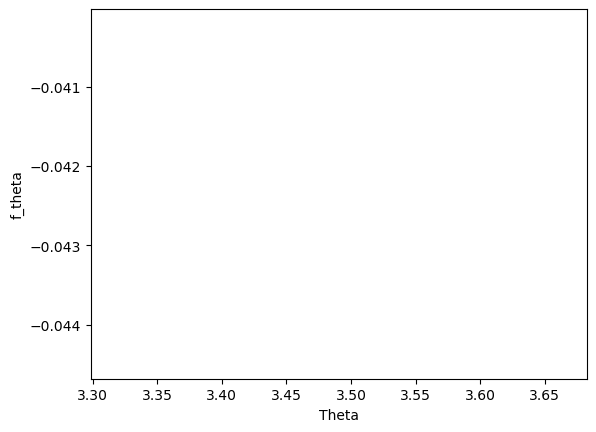

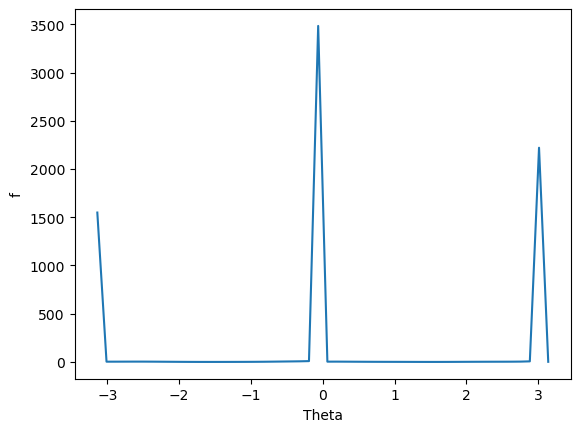

In [48]:
n_range = np.linspace(0, 100)
f_values = np.zeros_like(n_range)

theta_range = np.linspace(-np.pi, np.pi)
for i, n in enumerate(n_range):
    hv = np.exp(-1j * n * t * a.T)
    b = hv.dot(psi_vec)
    c = b.T.dot(psi_vec)
    f = np.abs(np.sum(c * np.exp(1j * theta_range * n))) ** 2
    f_values[i] = f
plt.plot(theta_range, f_values)
plt.xlabel('Theta')
plt.ylabel('f')
plt.show()